<style>
div.cell, div.text_cell_render{
  max-width:760px;
  margin-left:auto;
  margin-right:auto;
}

.rendered_html
{
  font-size: 130%;
  }

.rendered_html li
{
  line-height: 1.;
  }

.rendered_html h1, h2 {
  font-familly:"Charis SIL", serif;
}

img { 
    max-width: 200% !important;
    height: auto !important;
}

.input_prompt, .CodeMirror-lines, .output_area
{
  font-family: Consolas, monospace;
  font-size: 120%;
}
</style>

# MATH5016 Scientific Python programming
Based on the material from Prof. Roberta Sinatra and Johannes Wachs

We use materials, code and ideas from the tutorials of [Greg Reda](https://github.com/gjreda/pydata2014nyc/blob/master/demo.ipynb) and [Tom Augspurger](http://tomaugspurger.github.io/modern-1.html).


### Today's plan:

We will continue our introduction to [Pandas](http://pandas.pydata.org/). 
We will 
- look at a weather timeseries dataset
- do more plotting 
- have a look at the seaborn library 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Part III: Time series in Pandas and plotting with Seaborn
Let's look at bike sharing data from Chicago. In Chicago there is a bike-sharing program just like Budapest's Bubi, called Divvy. We have two datasets: one on trips and another on stations. We'll have to combine the two to explore how people use Divvy.

In [2]:
trips=pd.read_csv('divvy_trips_august_2013.csv')

C:\Users\szmnk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(trips)

170508

In [4]:
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,134677,2013-08-01 00:13:00,8/1/2013 0:28,135,864,42.0,Michigan Ave & Oak St,44.0,Ogden Ave & Chicago Ave,Customer,NaN,NaN
1,134679,2013-08-01 00:28:00,8/1/2013 0:41,135,767,44.0,Ogden Ave & Chicago Ave,NaN,Congress Pkwy & Ogden Ave,Customer,NaN,NaN
2,134682,2013-08-01 00:57:00,8/1/2013 3:42,183,9920,337.0,Lake Shore Dr & Ohio St,43.0,Michigan Ave & Lake St,Customer,NaN,NaN
3,134683,2013-08-01 00:57:00,8/1/2013 3:43,512,9931,337.0,Lake Shore Dr & Ohio St,309.0,Indiana Ave & Roosevelt Rd,Customer,NaN,NaN
4,134684,2013-08-01 00:58:00,8/1/2013 2:32,656,5678,68.0,Western Ave & Winnebago Ave,68.0,Western Ave & Winnebago Ave,Customer,NaN,NaN


In [5]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170508 entries, 0 to 170507
Data columns (total 12 columns):
trip_id              170508 non-null int64
starttime            170508 non-null object
stoptime             170508 non-null object
bikeid               170508 non-null int64
tripduration         170508 non-null int64
from_station_id      170198 non-null float64
from_station_name    170508 non-null object
to_station_id        170169 non-null float64
to_station_name      170508 non-null object
usertype             170508 non-null object
gender               60409 non-null object
birthyear            60364 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 15.6+ MB


## Column meanings:
- trip_id: trip identifier
- starttime: time bike was rented
- stoptime: time bike was returned
- bikeid: bike identifier
- trip duration: duration of the trip in seconds
- from_station_id: station id from which bike was borrowed
- from_station_name: station name from which bike was borrowed
- to_station_id: station id to which bike was returned
- to_station_name: sstation id to which bike was returned
- usertype: Customer or subscribers. Customers are one time users that pay for single trips, subscribers buy a monthly -pass with unlimited rides.
- gender: Gender, if known, of user
- birthyear: year of birth, if known, of user

### Long-tailed trip durations
We have a few trips that are much longer than average. Let's look at the distribution.

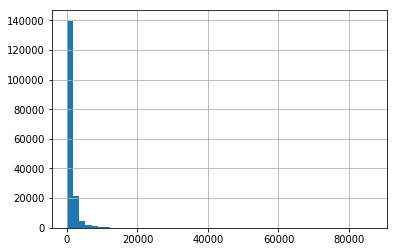

In [7]:
trips.tripduration.hist(bins=50)

Let's take the logarithm of the column and see if it is any better. We could define the function and use `.apply()`, but there is a faster way using lambda functions. Lambda functions are defined and remembered only in the moment they are used.

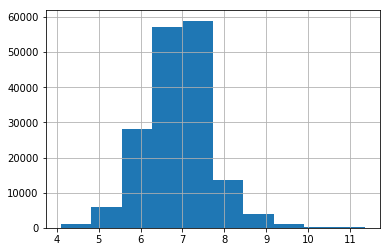

In [8]:
#dataframe.column.map(lambda x: function(x))
trips.tripduration.map(lambda x: np.log(x)).hist()

In [9]:
trips['log_duration']=trips.tripduration.map(lambda x: np.log(x))

## Let's turn those time columns into true Python datetimes

In [10]:
trips.starttime= pd.to_datetime(trips.starttime,format="%Y-%m-%d %H:%M")
trips.stoptime= pd.to_datetime(trips.stoptime,format="%m/%d/%Y %H:%M")

Note about pandas to_datetime: if you don't pass a format Pandas will try to guess it. It does a decent job, but takes slower and is risky. One can also pass errors = "coerce" and it will return NaT (Not a Time) values for those entries that don't fit into the format you give.

In [11]:
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,log_duration
0,134677,2013-08-01 00:13:00,2013-08-01 00:28:00,135,864,42.0,Michigan Ave & Oak St,44.0,Ogden Ave & Chicago Ave,Customer,NaN,NaN,6.761573
1,134679,2013-08-01 00:28:00,2013-08-01 00:41:00,135,767,44.0,Ogden Ave & Chicago Ave,NaN,Congress Pkwy & Ogden Ave,Customer,NaN,NaN,6.642487
2,134682,2013-08-01 00:57:00,2013-08-01 03:42:00,183,9920,337.0,Lake Shore Dr & Ohio St,43.0,Michigan Ave & Lake St,Customer,NaN,NaN,9.202308
3,134683,2013-08-01 00:57:00,2013-08-01 03:43:00,512,9931,337.0,Lake Shore Dr & Ohio St,309.0,Indiana Ave & Roosevelt Rd,Customer,NaN,NaN,9.203416
4,134684,2013-08-01 00:58:00,2013-08-01 02:32:00,656,5678,68.0,Western Ave & Winnebago Ave,68.0,Western Ave & Winnebago Ave,Customer,NaN,NaN,8.644354


In [12]:
#let's check what kind of users we have
trips.usertype.value_counts()

Customer      110101
Subscriber     60407
Name: usertype, dtype: int64

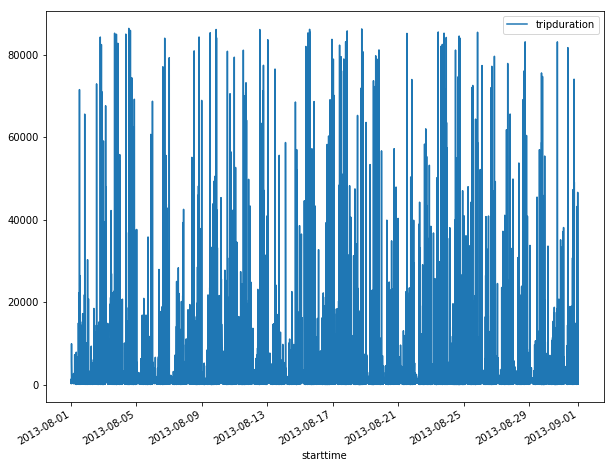

In [13]:
#let's see the variation in duration by start time across the whole month
trips.plot(kind='line',x='starttime',y='tripduration',figsize=(10,8))

### Let's see which bike is on the road the longest: perhaps a good candidate for early retirement.

In [14]:
#groupby bikeid, summing over trip durations. then sort in decreasing order and take the top ten
trips.groupby(['bikeid']).tripduration.apply(sum).sort_values(ascending=False)[0:10]

bikeid
755     357140
1016    356926
151     346628
199     325733
744     320116
1015    317510
487     315541
872     307789
682     307401
925     297240
Name: tripduration, dtype: int64

In [15]:
#vs the 10 least used bikes
trips.groupby(['bikeid']).tripduration.apply(sum).sort_values()[0:10]

bikeid
1616      371
1319     4736
12       5751
1696     6567
837      8276
1604    10753
216     11647
955     11966
1758    13124
110     14032
Name: tripduration, dtype: int64

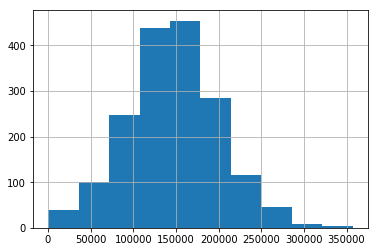

In [16]:
#let's check out the distribution
trips.groupby(['bikeid']).tripduration.apply(sum).hist()

## Recall that we also have information about stations in 'Divvy_Stations_2013.csv'. Let's have a look at this data and add it to our trips dataframe.

In [17]:
stations = pd.read_csv('Divvy_Stations_2013.csv')

In [18]:
stations.head()

,name,latitude,longitude,dpcapacity
0,State St & Harrison St,41.873958,-87.627739,19
1,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19
2,Morgan St & 18th St,41.858086,-87.651073,15
3,Racine Ave & 18th St,41.858181,-87.656487,15
4,Wood St & North Ave,41.910329,-87.672516,15


## Pandas has great functions to join dataframes. We already saw concat in the Titanic set. 

This is a bit different, however. We have a much smaller dataframe with totally different rows. We rather want to join the stations dataframe to the trips dataframe so that we have lat/long/capacity data for each trips' starting and ending stations. The name column in the stations frame corresponds to the from_station_name and to_station_name columns in the trip frame.

In [19]:
#first merge trips and stations  for the starting stations
trips = pd.merge(trips, stations, how='left', left_on='from_station_name', right_on='name')
#then merge trips and stations for the destination stations, added a suffix list for duplicated names
trips =pd.merge(trips, stations, how='inner', left_on='to_station_name', right_on='name', suffixes=['_origin', '_dest'])


In [20]:
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,...,birthyear,log_duration,name_origin,latitude_origin,longitude_origin,dpcapacity_origin,name_dest,latitude_dest,longitude_dest,dpcapacity_dest
0,134677,2013-08-01 00:13:00,2013-08-01 00:28:00,135,864,42.0,Michigan Ave & Oak St,44.0,Ogden Ave & Chicago Ave,Customer,...,NaN,6.761573,Michigan Ave & Oak St,41.900960,-87.623777,15,Ogden Ave & Chicago Ave,41.896362,-87.654061,19
1,134701,2013-08-01 03:43:00,2013-08-01 04:12:00,493,1781,194.0,Ogden Ave & Race Ave,44.0,Ogden Ave & Chicago Ave,Customer,...,NaN,7.484930,Ogden Ave & Race Ave,41.891795,-87.658751,15,Ogden Ave & Chicago Ave,41.896362,-87.654061,19
2,134702,2013-08-01 03:42:00,2013-08-01 04:12:00,95,1802,194.0,Ogden Ave & Race Ave,44.0,Ogden Ave & Chicago Ave,Customer,...,NaN,7.496652,Ogden Ave & Race Ave,41.891795,-87.658751,15,Ogden Ave & Chicago Ave,41.896362,-87.654061,19
3,134704,2013-08-01 03:45:00,2013-08-01 04:12:00,197,1627,194.0,Ogden Ave & Race Ave,44.0,Ogden Ave & Chicago Ave,Customer,...,NaN,7.394493,Ogden Ave & Race Ave,41.891795,-87.658751,15,Ogden Ave & Chicago Ave,41.896362,-87.654061,19
4,134996,2013-08-01 07:45:00,2013-08-01 07:57:00,499,698,341.0,Canal St & Madison St,44.0,Ogden Ave & Chicago Ave,Customer,...,NaN,6.548219,Canal St & Madison St,41.882091,-87.639833,23,Ogden Ave & Chicago Ave,41.896362,-87.654061,19


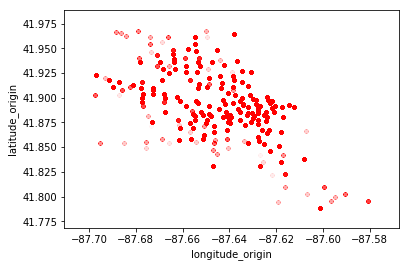

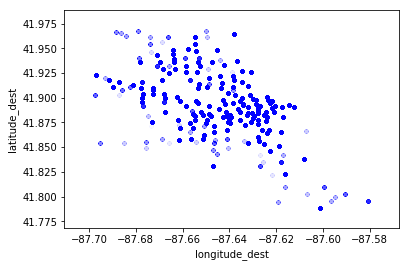

In [21]:
#let's plot the longitude and latitude. 
trips.plot(kind='scatter',x='longitude_origin',y='latitude_origin',alpha=.005,c='r')
trips.plot(kind='scatter',x='longitude_dest',y='latitude_dest',alpha=.005,c='b')

## Exercise: calculate the number of trips from station to station for each pair of stations. Share the top 10!

In [22]:
#solution
station_to_station =trips.groupby(['from_station_name','to_station_name']).trip_id.count().reset_index()
station_to_station.sort_values('trip_id',ascending=False)[0:10]

,from_station_name,to_station_name,trip_id
9736,Lake Shore Dr & Monroe St,Streeter Dr & Illinois St,819
18475,Streeter Dr & Illinois St,Streeter Dr & Illinois St,652
9673,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,638
13067,Millennium Park,Millennium Park,588
12461,Michigan Ave & Oak St,Michigan Ave & Oak St,570
13760,Museum Campus,Museum Campus,549
18404,Streeter Dr & Illinois St,Lake Shore Dr & Monroe St,515
18430,Streeter Dr & Illinois St,Millennium Park,511
9702,Lake Shore Dr & Monroe St,Museum Campus,466
13730,Museum Campus,Lake Shore Dr & Monroe St,463


In [25]:
trips.groupby(['from_station_name','to_station_name']).trip_id

In [26]:
temp=trips.groupby(['from_station_name','to_station_name']).trip_id.count()

In [28]:
temp.reset_index().head()

,from_station_name,to_station_name,trip_id
0,900 W Harrison,900 W Harrison,14
1,900 W Harrison,Aberdeen St & Jackson Blvd,3
2,900 W Harrison,Aberdeen St & Madison St,1
3,900 W Harrison,Ashland Ave & Wellington Ave,1
4,900 W Harrison,Blue Island Ave & 18th St,6


## Timeseries exploration

In [29]:
# Time is precise to minute, we want to see counts by nearest hour
trips.starttime.value_counts()[:3]

2013-08-23 16:54:00    28
2013-08-24 14:43:00    28
2013-08-18 13:15:00    28
Name: starttime, dtype: int64

In [30]:
from datetime import timedelta

def round_time(dt, mins=60):
    """
    Rounds a datetime object to its nearest hour (by default).
    (e.g. 2014-02-01 10:45:13 becomes 2014-02-01 11:00:00)
    """
    dt += timedelta(minutes=mins/2.)
    dt -= timedelta(minutes=dt.minute % mins, seconds=dt.second)
    return dt

In [31]:
trips['starthour'] = trips.starttime.apply(round_time)
trips['stophour'] = trips.stoptime.apply(round_time)

In [32]:
trips[['starttime', 'starthour']].head(5)

,starttime,starthour
0,2013-08-01 00:13:00,2013-08-01 00:00:00
1,2013-08-01 03:43:00,2013-08-01 04:00:00
2,2013-08-01 03:42:00,2013-08-01 04:00:00
3,2013-08-01 03:45:00,2013-08-01 04:00:00
4,2013-08-01 07:45:00,2013-08-01 08:00:00


## Exercises:
- write a function that rounds each start time to the nearest half hour and add such columns to our dataframe as starthalfhour and endhalfhour
- use the datetime library's .dayofweek method to add the day of the week (i.e. Monday, Tuesday,...) to the dataframe for each trip.
- groupby day of the week and hours and count the number of trips. use the unstack method on the grouped frame and plot the result.

- Investigate how customers and subscribers differ in behavior (frequency, timing).
- Investigate the relationship between station capacity and traffic. Which two stations would you expand if you had the budget?
- Which stations are sources and which stations are sinks? i.e. which stations have much more departures than arrivals, and vice versa.
- Advanced: find a source for weather data and check if it rained on each day in our set. Add this as a binary variable. How does rain influence use? 
- Advanced: plot the directed network of trips between bike stations. The nodes are stations and edges indicate a trip from station A to B. Add a weight to the edges that increases in the frequency. Remove edges below some weight threshold you think is reasonable. Finally, plot the network!

Write a function that rounds each start time to the nearest half hour and add such columns to our dataframe as starthalfhour and endhalfhour

In [43]:
def round_time_half(dt, mins=30):
    """
    Rounds a datetime object to its nearest hour (by default).
    (e.g. 2014-02-01 10:45:13 becomes 2014-02-01 11:00:00)
    """
    dt += timedelta(minutes = mins/2.)
    dt -= timedelta(minutes = dt.minute % mins, seconds=dt.second)
    return dt

In [68]:
trips['starthourhalf'] = trips.starttime.apply(round_time_half)
trips['stophourhalf'] = trips.stoptime.apply(round_time_half)

Use the datetime library's .dayofweek method to add the day of the week (i.e. Monday, Tuesday,...) to the dataframe for each trip

In [70]:
day_vector = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
def day_of_week(x):
    return day_vector[x.dayofweek]

In [71]:
trips['dayofweek'] = trips.starttime.apply(day_of_week)

Groupby day of the week and hours and count the number of trips. use the unstack method on the grouped frame and plot the result.

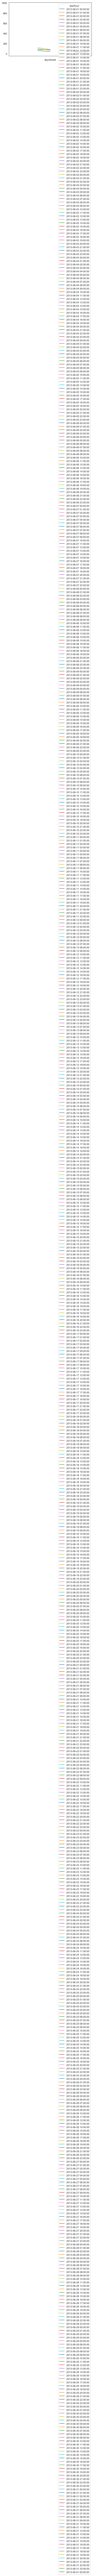

In [88]:
trips_start = trips.groupby(['dayofweek', 'starthour']).trip_id.count().unstack().plot()


In [90]:
#solution (#2/3):
weekdays = trips['starttime'].apply(lambda d: d.dayofweek)
hours = trips['starttime'].apply(lambda d: d.hour)
by_weekday_hour = trips.groupby([weekdays, hours])['trip_id'].count()
by_weekday_hour.index.names = ['weekday', 'hour'] # rename MultiIndex


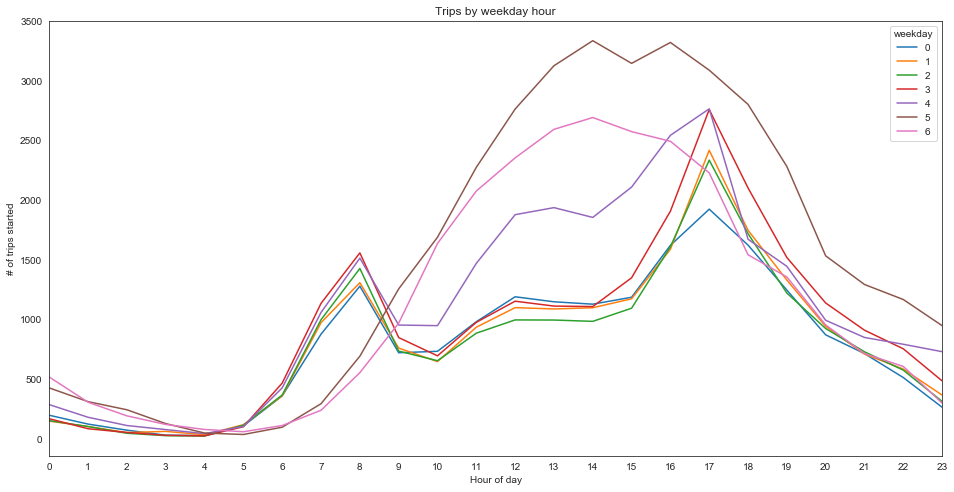

In [91]:
by_weekday_hour.unstack(0).plot(figsize=(16,8))
plt.title('Trips by weekday hour')
plt.ylabel('# of trips started')
plt.xlabel('Hour of day')
plt.xticks(range(24))
plt.xlim(0, 23);

# Part IV Plotting from Pandas in Seaborn
Pandas plotting is simple but limited, matplotlib plotting is complicated but powerful. A library called Seaborn is in the middle. It works very well with data in Pandas.

In [74]:
import seaborn as sns
sns.set_style('white')

***
If seaborn is not installed on the machine you are using:
* if you have a unix machine, open a shell and simply type `pip install seaborn`
* if you are using your own laptop and have windows, open a terminal (just type cmd in your search box) and also tryp pip install seaborn
* if you are using a lab computer, open the anaconda navigator, go in `environment`, search for the package seaborn (make sure you select the not installed packages) and install it. Have a look at the screenshot below.
<img src="seaborn.png" alt="Installation window" style="width:608px;height:456px;">
***

In [92]:
#let's create some features using lambda functions
trips['hour']=trips['starttime'].apply(lambda x: x.hour)
trips['weekday']=trips['starttime'].apply(lambda x: x.dayofweek)
trips['weekend']=trips['weekday'].apply(lambda x: 1 if x in [5,6] else 0)

C:\Users\szmnk\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


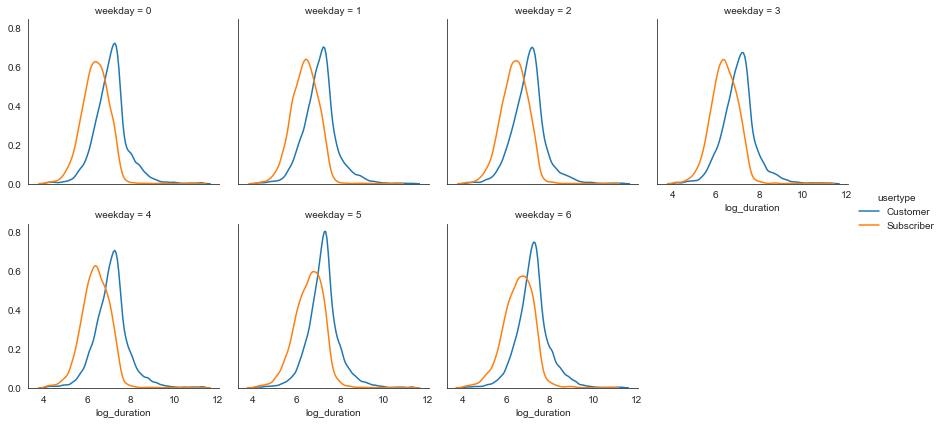

In [93]:
g = sns.FacetGrid(trips, col='weekday', hue='usertype', col_wrap=4)
g.map(sns.kdeplot, 'log_duration')
g.add_legend()

## Exercise: plot the distribution of trip duration for men and women, 

In [ ]:
#lets check out the number of trips by day and user type and keep track of the average duration
#we can pass a dictionary to the groupby aggregation that aggregates different columns (keys) by
#different functions (values)
number_of_trips = trips.groupby(['weekday','usertype']).agg({'trip_id':'count','log_duration':'mean'}).reset_index()

In [ ]:
number_of_trips.head()

In [ ]:
ax=sns.pointplot(data=number_of_trips,x='weekday',y='trip_id',hue='usertype')
ax.set_ylabel('Average Number of Trips')
ax.set_title('Average Trips per Day by User Type')
#despine removes top and right sides of the frame
sns.despine()

### Data sources
* Wikipedia: API/html <a href="https://www.mediawiki.org/wiki/API:Main_page">https://www.mediawiki.org/wiki/API:Main_page</a> or html download
* Networks: <a href="https://snap.stanford.edu/data/">Stanford Large Network Dataset Collection
</a>
* imdb: <a href="https://www.imdb.com/interfaces/">IMDB data</a>
* kaggle: <a href="https://www.kaggle.com/">various datasets</a>
* Hungarian temperatures: <a href="https://www.met.hu/">met.hu</a> Éghajlat -> Magyarország éghajlata -> Éghajlati adatsorok 1901–2010 -> City -> Adatok -> Adatok letöltése
* Twitter: <a href="https://developer.twitter.com/">Twitter API</a>
* Surveys: <a href="https://github.com/fivethirtyeight/data">FiveThirtyEight</a>
* Machine learning <a href="http://mlr.cs.umass.edu/ml/datasets.html">UCI Machine Learning Repository</a>